In [14]:
# Load libraries
import os
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.ticker import MaxNLocator
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [2]:
# Full factorial data
data = pd.read_csv('../KineticModel/fullfactorial_production_triplicates_noise.csv', index_col=0)

# Use average of replicates as ML output
data['NewColumn'] = data['TAL'].astype(str) + data['C3H'].astype(str) + data['COMT'].astype(str) + data['FCS'].astype(str) + data['CCOAOMT'].astype(str) + data['DCS'].astype(str) + data['CURS'].astype(str) 
data = data.set_index('NewColumn')
data = data.groupby(data.index).mean()
data = data.reset_index().drop('NewColumn', axis=1)
data

TAL  C3H  COMT  FCS  CCOAOMT  DCS  CURS       cur  cur_5noise  \
0     -1   -1    -1   -1       -1   -1    -1  0.022322    0.018796   
1     -1   -1    -1   -1       -1   -1     1  0.021846    0.021140   
2     -1   -1    -1   -1       -1    1    -1  0.021893    0.021506   
3     -1   -1    -1   -1       -1    1     1  0.017878    0.019001   
4     -1   -1    -1   -1        1   -1    -1  0.019719    0.020962   
..   ...  ...   ...  ...      ...  ...   ...       ...         ...   
123    1    1     1    1       -1    1     1  0.070577    0.071720   
124    1    1     1    1        1   -1    -1  0.045143    0.046083   
125    1    1     1    1        1   -1     1  0.053272    0.053409   
126    1    1     1    1        1    1    -1  0.046529    0.043100   
127    1    1     1    1        1    1     1  0.048738    0.049693   

     cur_10noise  cur_20noise  
0       0.024301     0.010335  
1       0.020907     0.025446  
2       0.025036     0.016869  
3       0.024088     0.026071  
4       0.014009     0.013193  
..           ...          ...  
123     0.070100     0.066611  
124     0.046225     0.047278  
125     0.050960     0.053382  
126     0.042460     0.042717  
127     0.051454     0.060644  

[128 rows x 11 columns]

In [3]:
# Load selected experiments: 
# df with selected experiments in every permutation of a DoE design or random sample

input_dir = '../GenerationOfDesigns/20noise' # Assuming 20% data in response
# input_dir = '../GenerationOfDesigns/5noise' # Assuming 5% data in response, uncomment to run

# Resolution V and random 64
er5 = pd.read_csv(os.path.join(input_dir, 'experiments_resv.csv'), index_col=0) 
erandom64 = pd.read_csv(os.path.join(input_dir, 'experiments_random64.csv'), index_col=0)
# Random 32
erandom32 = pd.read_csv(os.path.join(input_dir, 'experiments_random32.csv'), index_col=0)
# Resolution IV and random 16
er4 = pd.read_csv(os.path.join(input_dir, 'experiments_resiv.csv'), index_col=0)
erandom16 = pd.read_csv(os.path.join(input_dir, 'experiments_random16.csv'), index_col=0)
# PB and random 12
epb = pd.read_csv(os.path.join(input_dir, 'experiments_pb.csv'), index_col=0)
erandom12 = pd.read_csv(os.path.join(input_dir, 'experiments_random12.csv'), index_col=0)
# Resolution III and random 8
er3 = pd.read_csv(os.path.join(input_dir, 'experiments_resiii.csv'), index_col=0)
erandom8 = pd.read_csv(os.path.join(input_dir, 'experiments_random8.csv'), index_col=0)


### Performance of random forest algorithms trained with different desigs

In [4]:
# R2 calculation using cross-validation
# Uncomment lines to perform the analysis or load the cv-results

# Perform analysis

# df_r2 = pd.DataFrame()
# df_r2_positive = pd.DataFrame()
# exp_df_list = [er5, erandom64, erandom32, er4, erandom16, epb, erandom12, er3, erandom8]
# nexp_list = [64, 64, 32, 16, 16, 12, 12, 8, 8]
# label_list = ['ResV', 'Random64', 'Random32', 'ResIV', 'Random16', 'PB', 'Random12', 'ResIII', 'Random8']
# for experiment_df, nexperiments, label in zip(exp_df_list, nexp_list, label_list):
#     cv_r2 = []
#     cv_r2_positive = []
#     for i, row in experiment_df[experiment_df.columns[:nexperiments]].iterrows():
#         index = [x - 1 for x in list(row)] # because in R index start in 1 and in python in 0
#         df = data.iloc[index]
#         X = df[df.columns[:7]].to_numpy() 
#         y = df['cur_5noise']
#         crossval_r2 = cross_val_score(estimator=RandomForestRegressor(), X=X, y=y, cv=10, scoring='r2')
#         cv_r2.append(np.nanmean(crossval_r2))
#         positive_values = [x for x in crossval_r2 if x > 0]
#         cv_r2_positive.append(np.nanmean(positive_values))
#     df_r2[label] = cv_r2
#     df_r2_positive[label] = cv_r2_positive
# df_r2.to_csv('cv_r2_20noise.csv')
# df_r2_positive.to_csv('cv_r2_positive_20noise.csv')

# Load csv results

df_r2 = pd.read_csv('cv_r2_20noise.csv', index_col=0)
df_r2_positive = pd.read_csv('cv_r2_positive_20noise.csv', index_col=0)

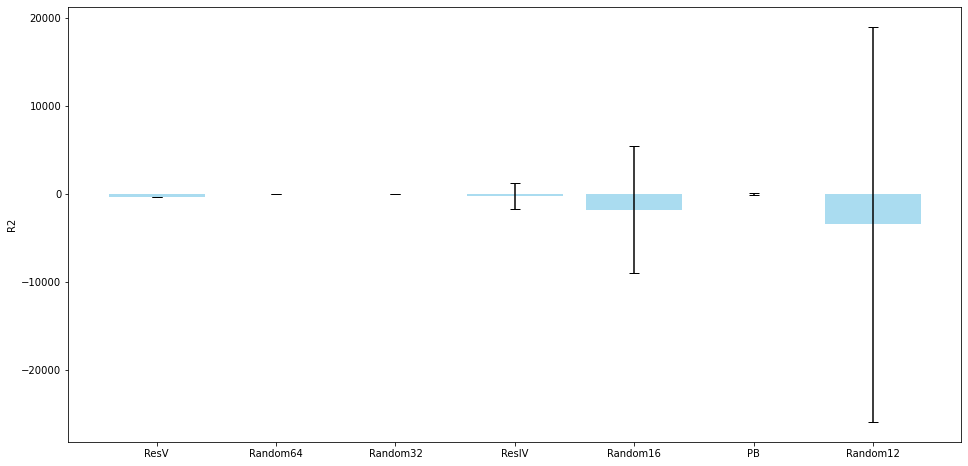

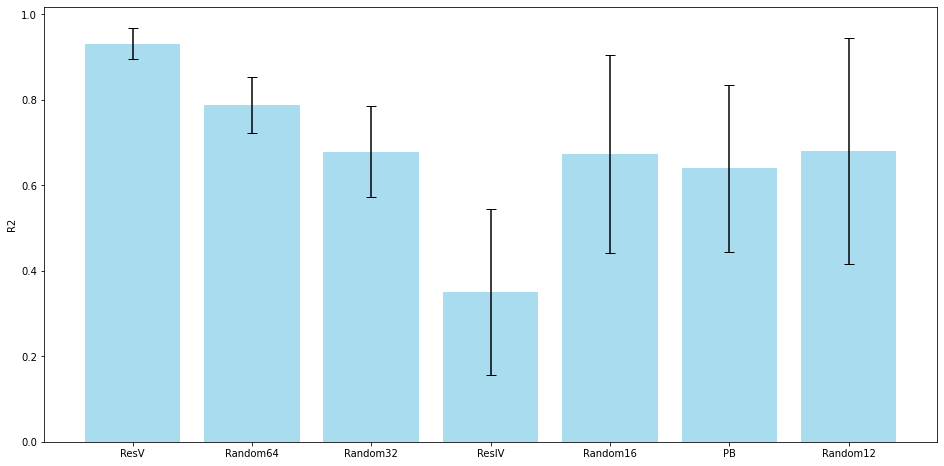

In [5]:
def bar_error_plot(df):
    plt.figure(figsize=(16, 8))
    # Calculate mean and standard deviation of columns
    mean_values = df.mean()
    std_dev = df.std()
    # Create a bar plot with error bars
    plt.bar(mean_values.index, mean_values.values, yerr=std_dev.values, capsize=5, alpha=0.7, color='skyblue')
    #plt.xticklabels()
    plt.ylabel('R2')
    plt.show()
    
bar_error_plot(df_r2)
bar_error_plot(df_r2_positive)

### Prediction of best strains

In [6]:
# Name strains based on production
data_sorted = data.sort_values('cur', ascending=False).reset_index().drop('index', axis=1)

#### Using cross-validation

In [7]:
# Calculated predicted top strains by random forest
# Uncomment lines to perform the analysis or load results

# Perform analysis

# rf_dict = {}
# exp_df_list = [er5, erandom64, erandom32, er4, erandom16, epb, erandom12, er3, erandom8]
# nexp_list = [64, 64, 32, 16, 16, 12, 12, 8, 8]
# label_list = ['ResV', 'Random64', 'Random32', 'ResIV', 'Random16', 'PB', 'Random12', 'ResIII', 'Random8']
# for experiment_df, nexperiments, label in zip(exp_df_list, nexp_list, label_list):
#     experiment_df = experiment_df.reset_index().drop('index', axis=1)
#     rf_dict[label] = {}
#     for i, row in experiment_df[experiment_df.columns[:nexperiments]].iterrows():
#         rf_dict[label][f'experiments-{i}'] = {}
#         index = [x - 1 for x in list(row)] # because in R index start in 1 and in python in 0
#         df = data.iloc[index]
#         X = df[df.columns[:7]].to_numpy() 
#         y = df['cur_5noise']
#         for cv_round in range(0,10):
#             rf_dict[label][f'experiments-{i}'][f'cv-{cv_round}'] = {}
#             model = RandomForestRegressor()
#             X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
#             model.fit(X_train, y_train)
#             y_pred_test = model.predict(X_test)
#             rf_dict[label][f'experiments-{i}'][f'cv-{cv_round}']['r2'] = r2_score(y_test, y_pred_test)
#             # Predict top2 strains
#             y_ff = model.predict(data_sorted[data_sorted.columns[:7]].to_numpy())
#             data_sorted['pred'] = y_ff
#             rf_dict[label][f'experiments-{i}'][f'cv-{cv_round}']['top2'] = list(data_sorted.sort_values('pred', ascending=False).index[:2])
        
# with open('random_forest_dict_20noise.pkl', 'wb') as fp:
#     pickle.dump(rf_dict, fp)

# Load results

with open('random_forest_dict_20noise.pkl', 'rb') as f:
    rf_dict = pickle.load(f)

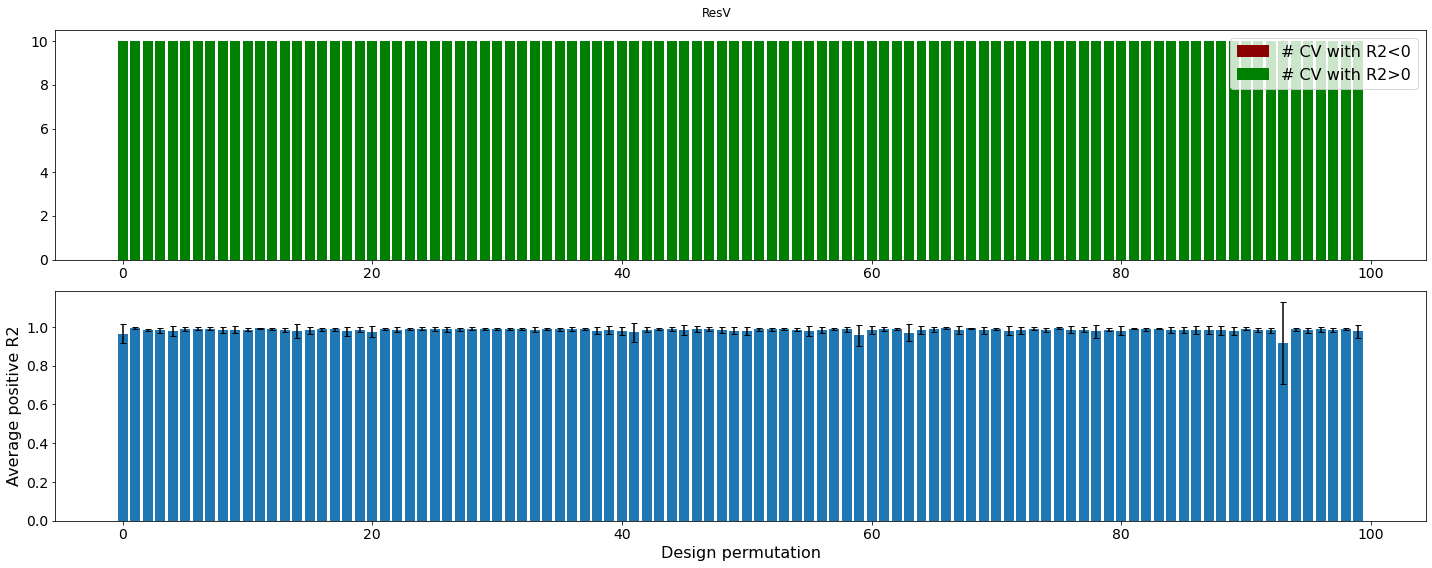

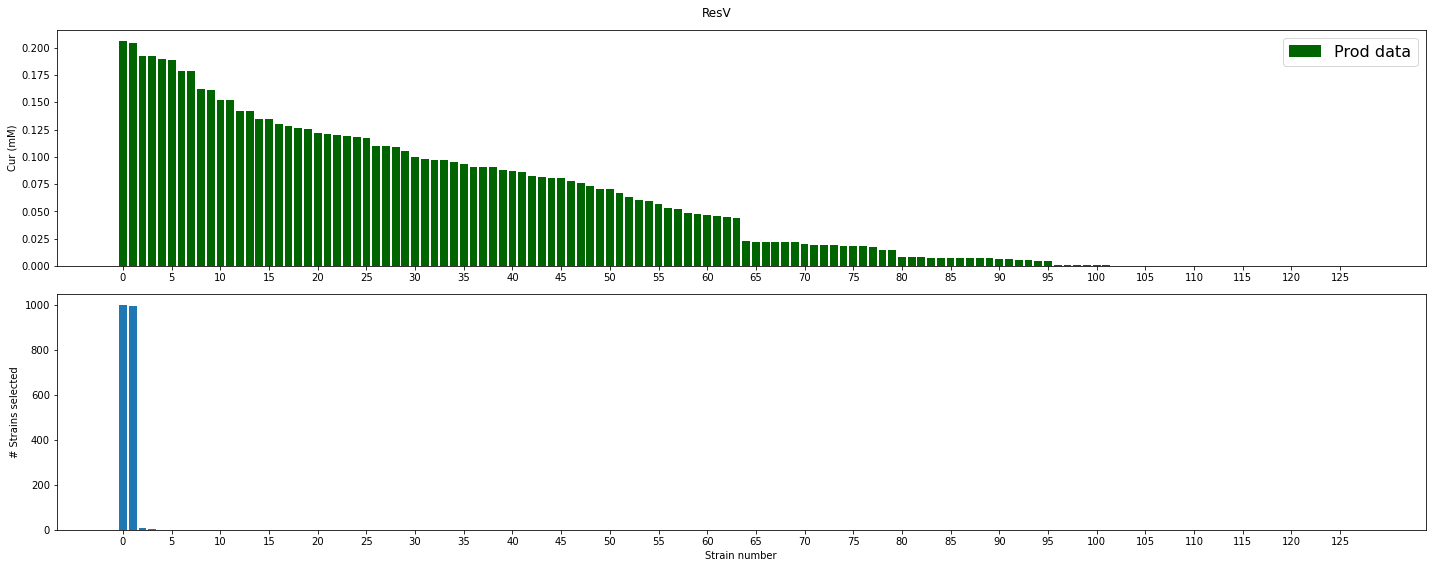

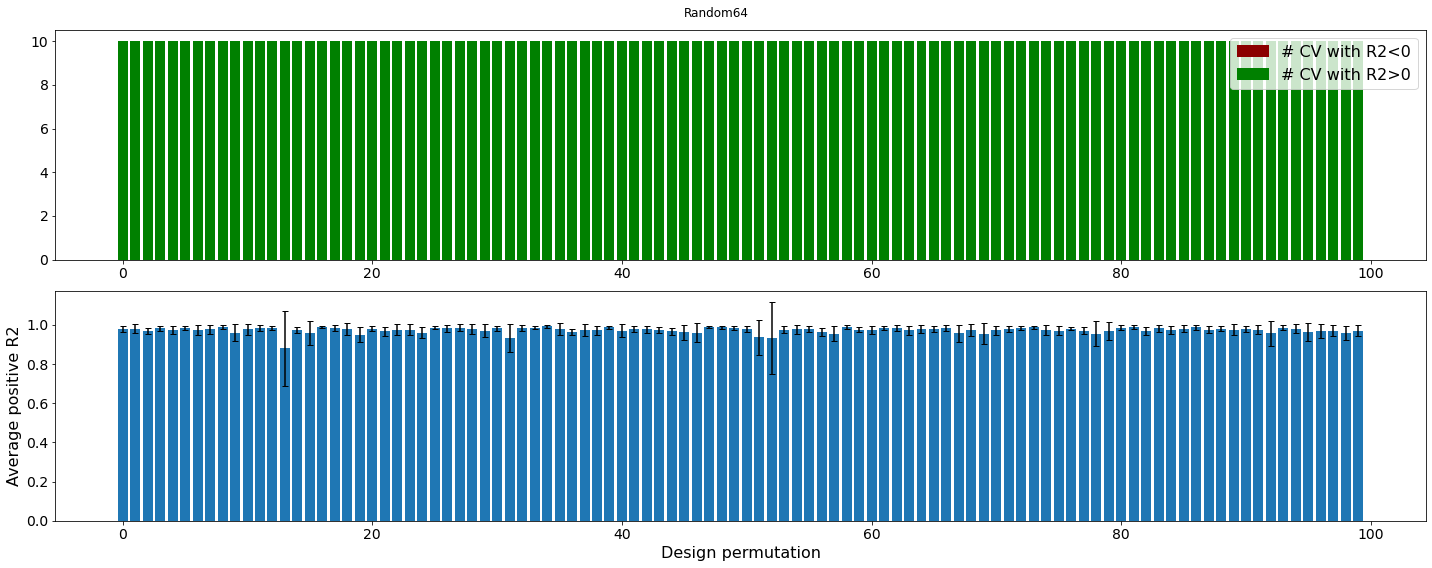

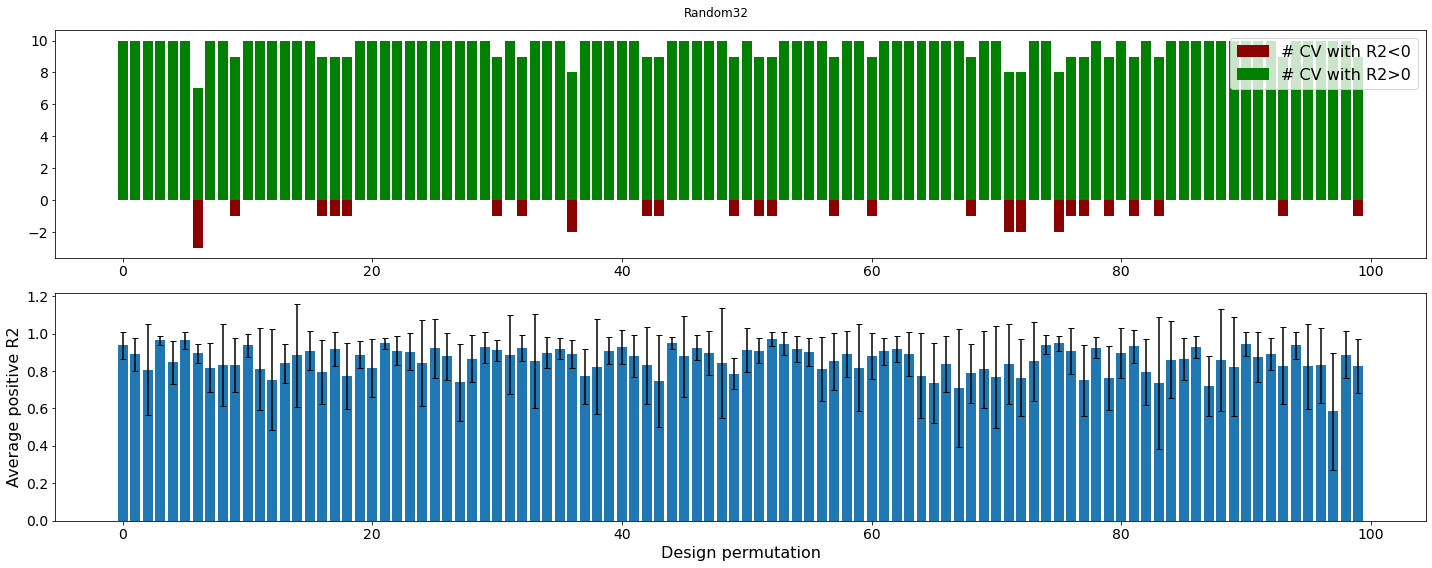

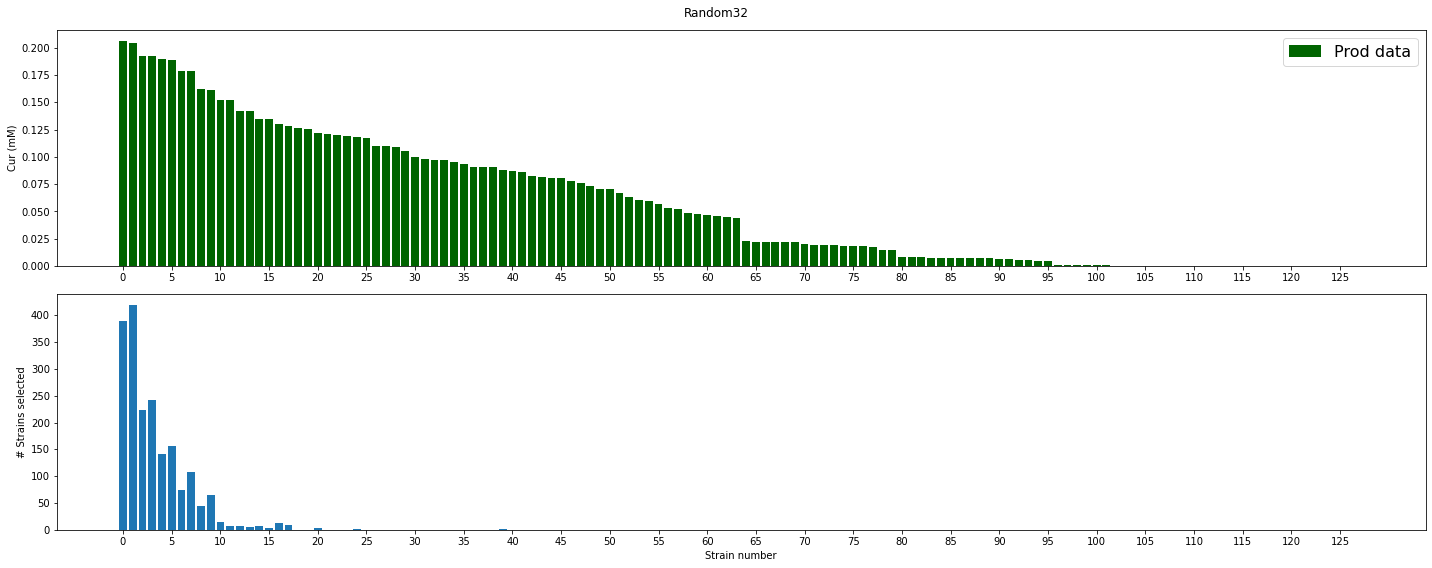

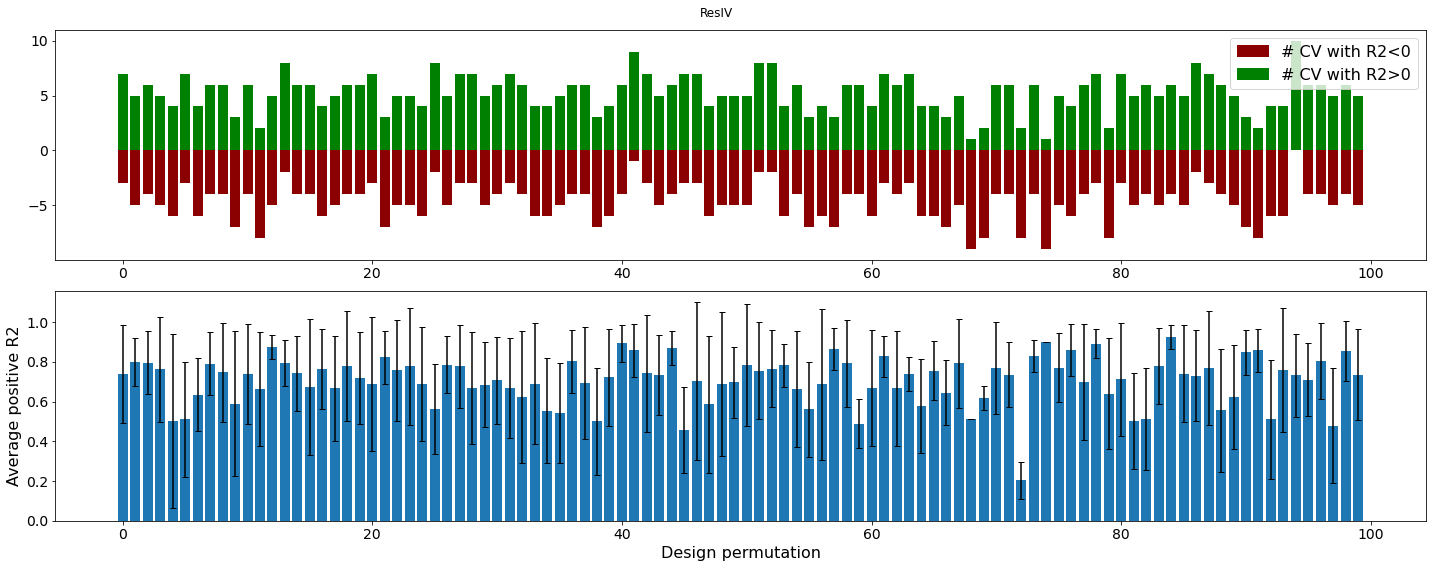

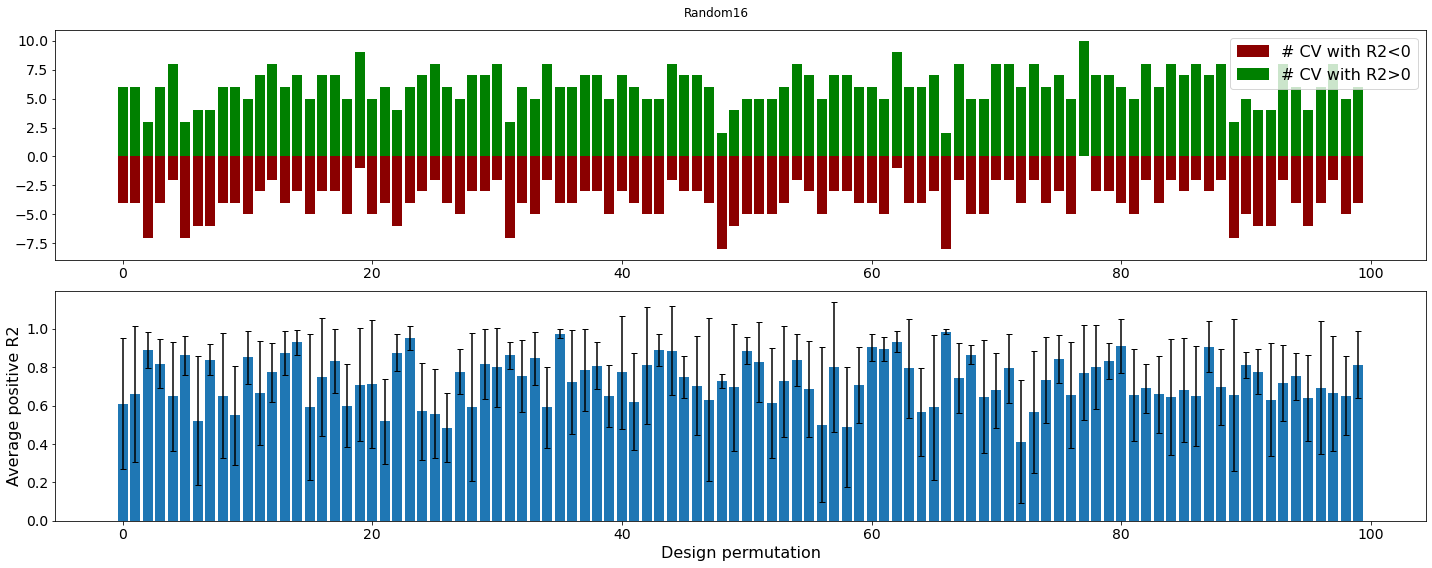

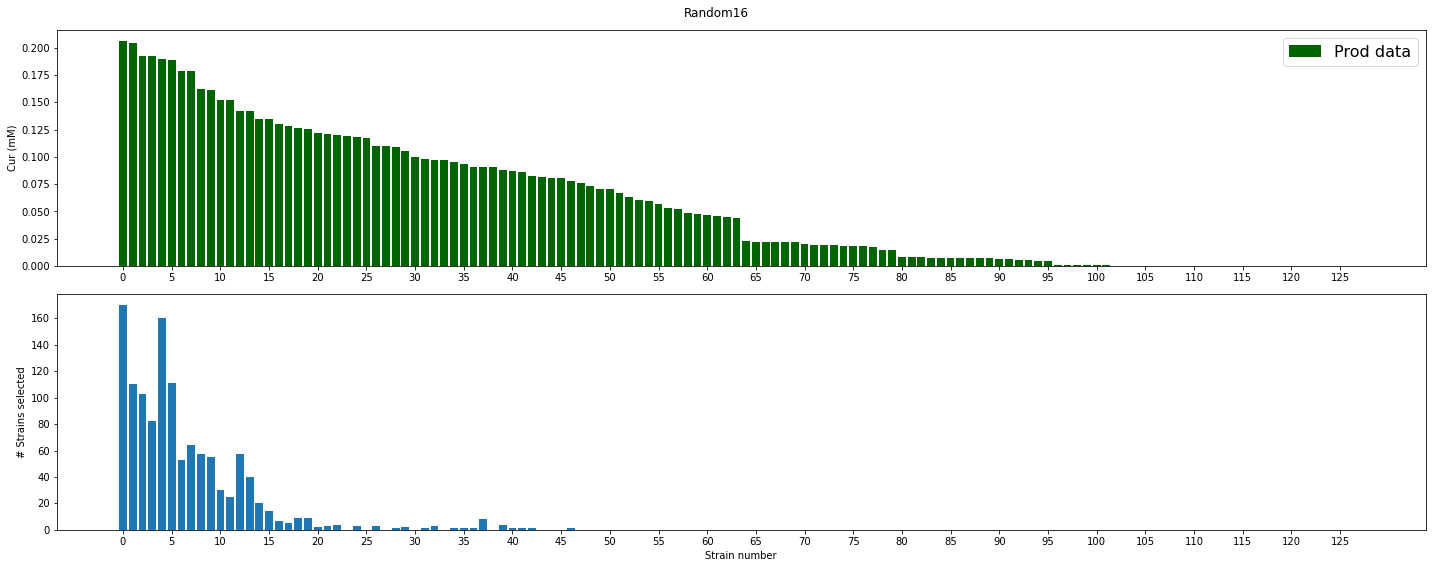

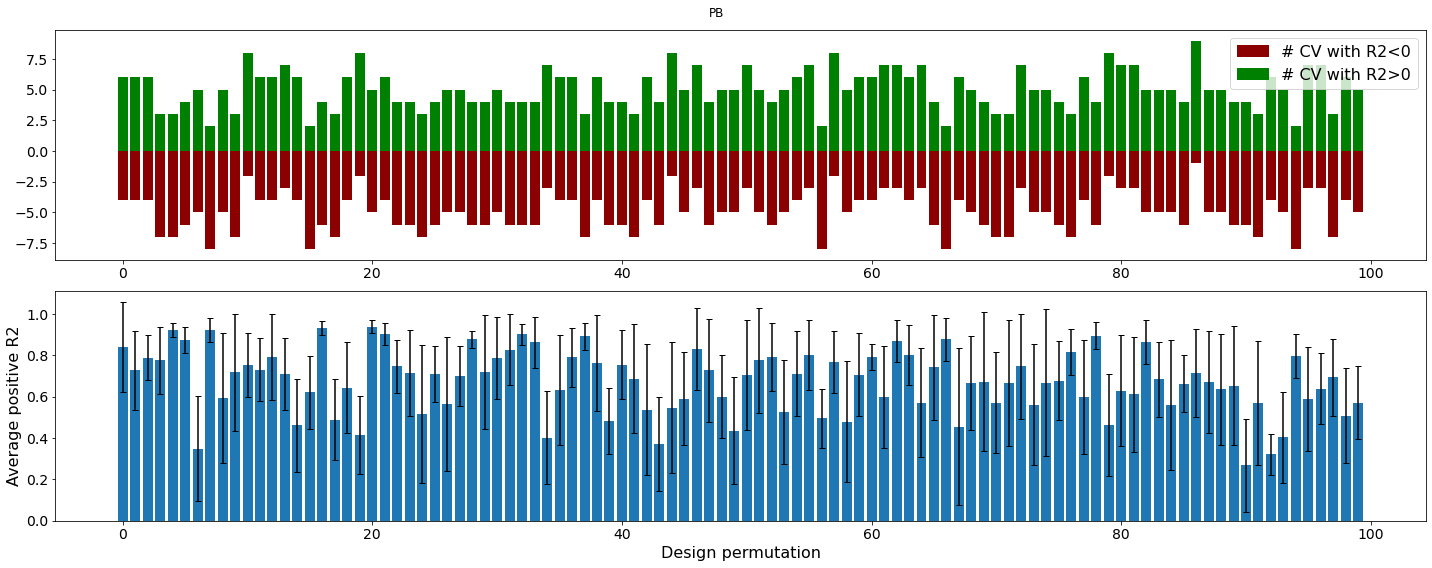

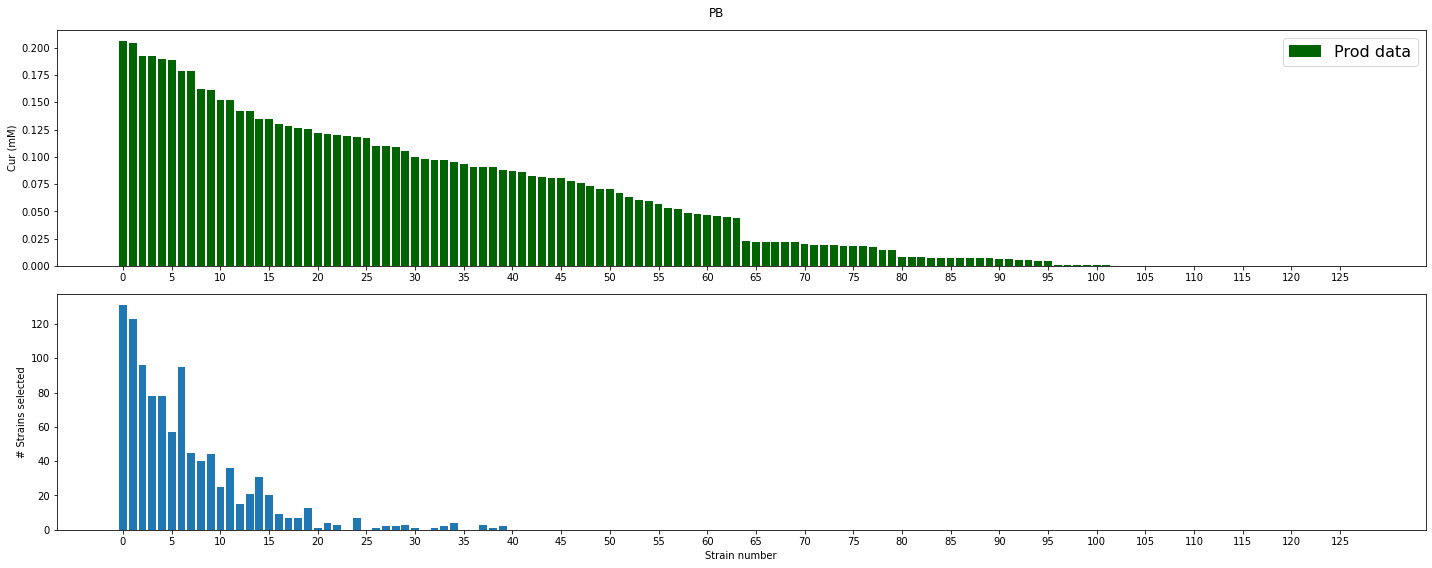

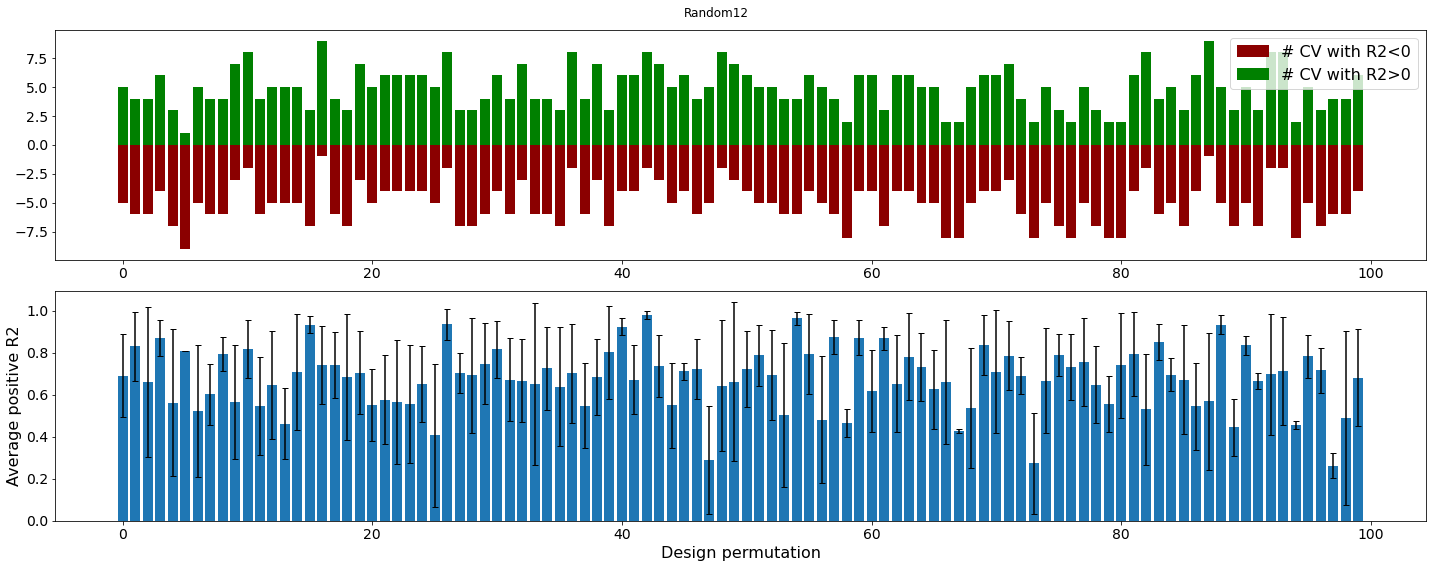

C:\Users\moren021\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


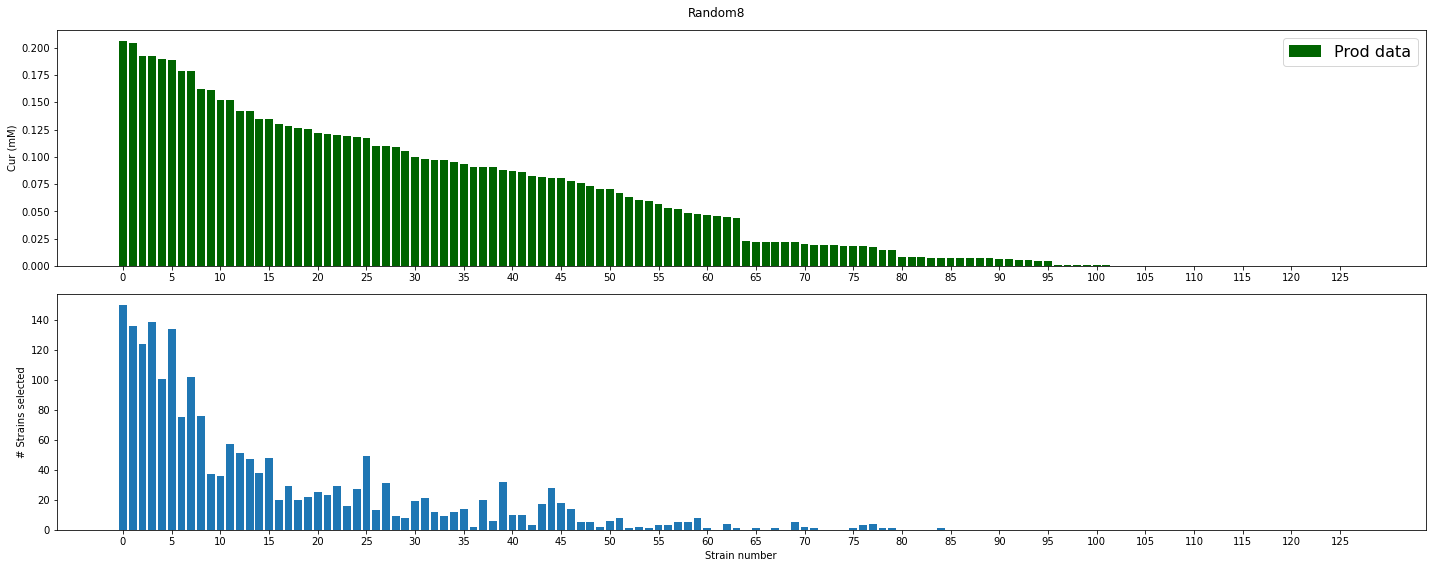

In [8]:
for design in rf_dict.keys():
    number_neg_r2 = []
    number_pos_r2 = []
    average_pos_r2 = []
    std_pos_r2 = []
    top_strains = []
    for experiment in rf_dict[design].keys():
        neg_r2 = 0
        pos_r2 = 0
        pos_r2_list = []
        for cv in rf_dict[design][experiment].keys():
            r2 = rf_dict[design][experiment][cv]['r2']
            top2 = rf_dict[design][experiment][cv]['top2']
            if r2 < 0:
                neg_r2 += 1
            else:
                pos_r2 += 1
                pos_r2_list.append(r2)
                top_strains += top2
        number_neg_r2.append(-neg_r2)
        number_pos_r2.append(pos_r2)
        average_pos_r2.append(np.mean(pos_r2_list))
        std_pos_r2.append(np.std(pos_r2_list))
    
    # Visualization R2
    fig, axs = plt.subplots(2,1,figsize=(20, 8), tight_layout=True)
    axs[0].tick_params(axis='both', labelsize=14)
    axs[0].bar(range(100), number_neg_r2, label='# CV with R2<0', color='darkred')
    axs[0].bar(range(100), number_pos_r2, label='# CV with R2>0', color='green')
    axs[0].legend(fontsize=16)
    axs[1].tick_params(axis='both', labelsize=14)
    axs[1].bar(range(100), average_pos_r2,yerr=std_pos_r2, capsize=3)
    axs[1].set_ylabel('Average positive R2', fontsize=16)
    axs[1].set_xlabel('Design permutation', fontsize=16)
    fig.suptitle(design)
    plt.show()
    
    # Visualization top strains
    dictionary = dict(zip(Counter(top_strains).keys(), Counter(top_strains).values()))
    top_strains_dict = {i: 0 for i in range(128)}
    for key in top_strains_dict.keys():
        try:
            top_strains_dict[key]=dictionary[key]
        except:
            continue
    fig, axs = plt.subplots(2,1,figsize=(20, 8), tight_layout=True)
    axs[0].bar(data_sorted.index, data_sorted['cur'], color='darkgreen', label='Prod data')
    axs[0].set_xticks(np.arange(0,130, 5))
    axs[0].set_ylabel('Cur (mM)')
    axs[0].legend(fontsize=16)
    axs[1].bar(top_strains_dict.keys(), top_strains_dict.values())
    axs[1].set_xticks(np.arange(0,130, 5))
    axs[1].set_ylabel('# Strains selected')
    axs[1].set_xlabel('Strain number')
    fig.suptitle(design)
    plt.show()



#### Training with all the data (no train-test split, equivalent to training linear models)

In [9]:
# Calculated predicted top strains by random forest using all data
# Uncomment lines to perform the analysis or load results

# Perform analysis

# rf_dict = {}
# exp_df_list = [er5, erandom64, erandom32, er4, erandom16, epb, erandom12, er3, erandom8]
# nexp_list = [64, 64, 32, 16, 16, 12, 12, 8, 8]
# label_list = ['ResV', 'Random64', 'Random32', 'ResIV', 'Random16', 'PB', 'Random12', 'ResIII', 'Random8']
# for experiment_df, nexperiments, label in zip(exp_df_list, nexp_list, label_list):
#     experiment_df = experiment_df.reset_index().drop('index', axis=1)
#     rf_dict[label] = {}
#     for i, row in experiment_df[experiment_df.columns[:nexperiments]].iterrows():
#         rf_dict[label][f'experiments-{i}'] = {}
#         index = [x - 1 for x in list(row)] # because in R index start in 1 and in python in 0
#         df = data.iloc[index]
#         X = df[df.columns[:7]].to_numpy() 
#         y = df['cur_5noise']
#         model = RandomForestRegressor()
#         model.fit(X, y)
#         y_pred = model.predict(X)
#         rf_dict[label][f'experiments-{i}']['r2'] = r2_score(y, y_pred)
#         # Predict top2 strains
#         y_ff = model.predict(data_sorted[data_sorted.columns[:7]].to_numpy())
#         data_sorted['pred'] = y_ff
#         rf_dict[label][f'experiments-{i}']['top2'] = list(data_sorted.sort_values('pred', ascending=False).index[:2])

# import pickle
# with open('random_forest_dict_20noise_noCV.pkl', 'wb') as fp:
#     pickle.dump(rf_dict, fp)

# Load data

with open('random_forest_dict_20noise_noCV.pkl', 'rb') as f:
    rf_dict = pickle.load(f)

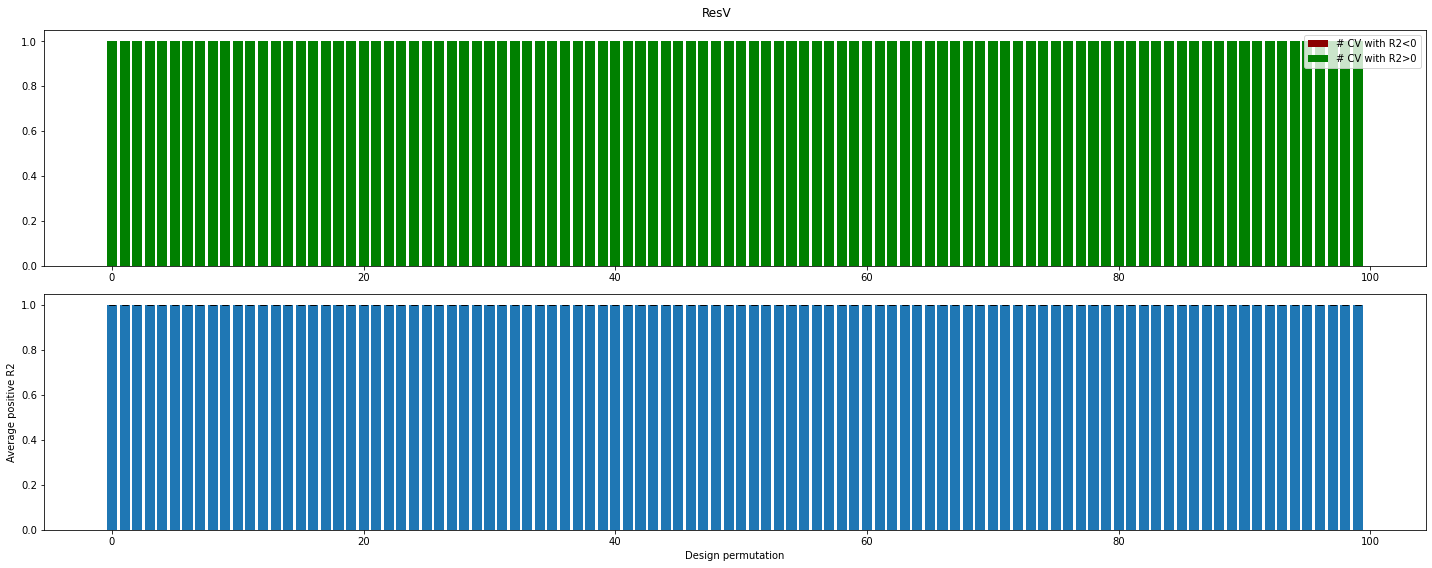

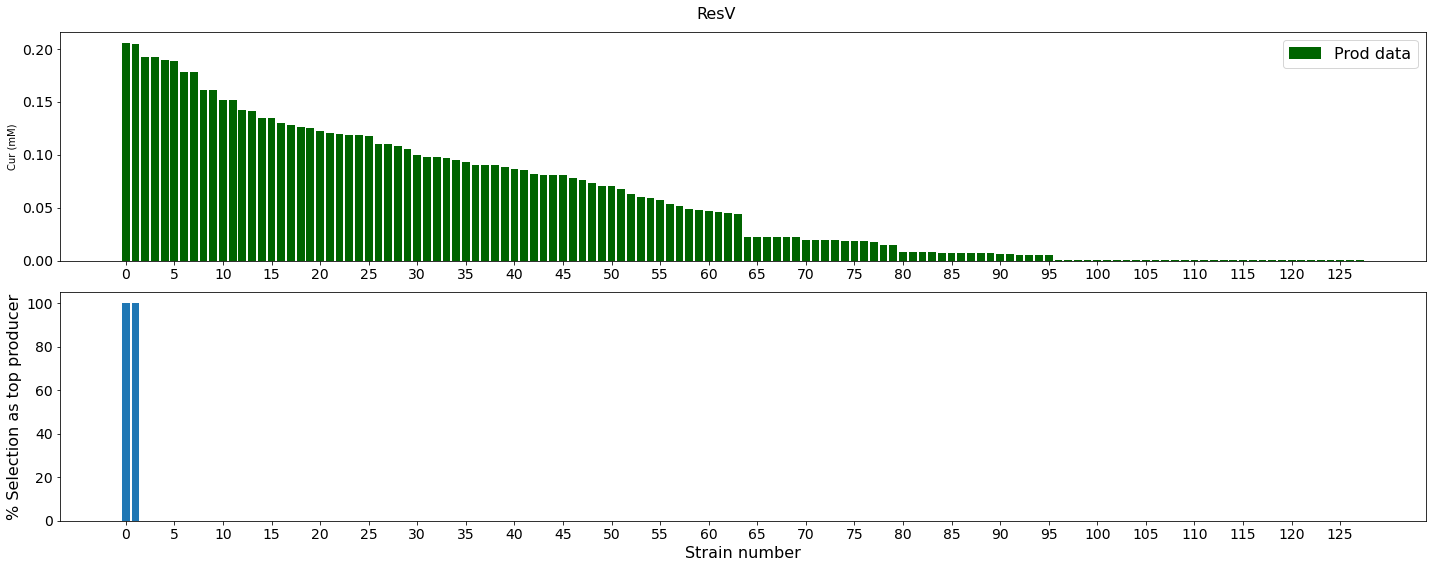

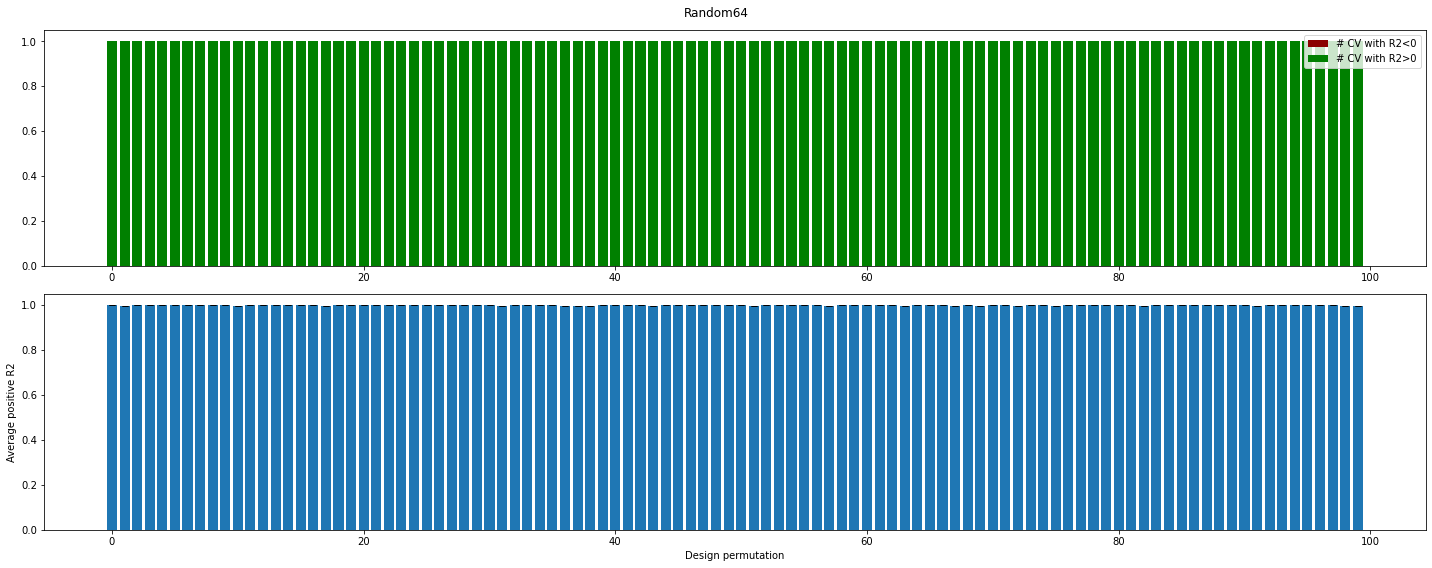

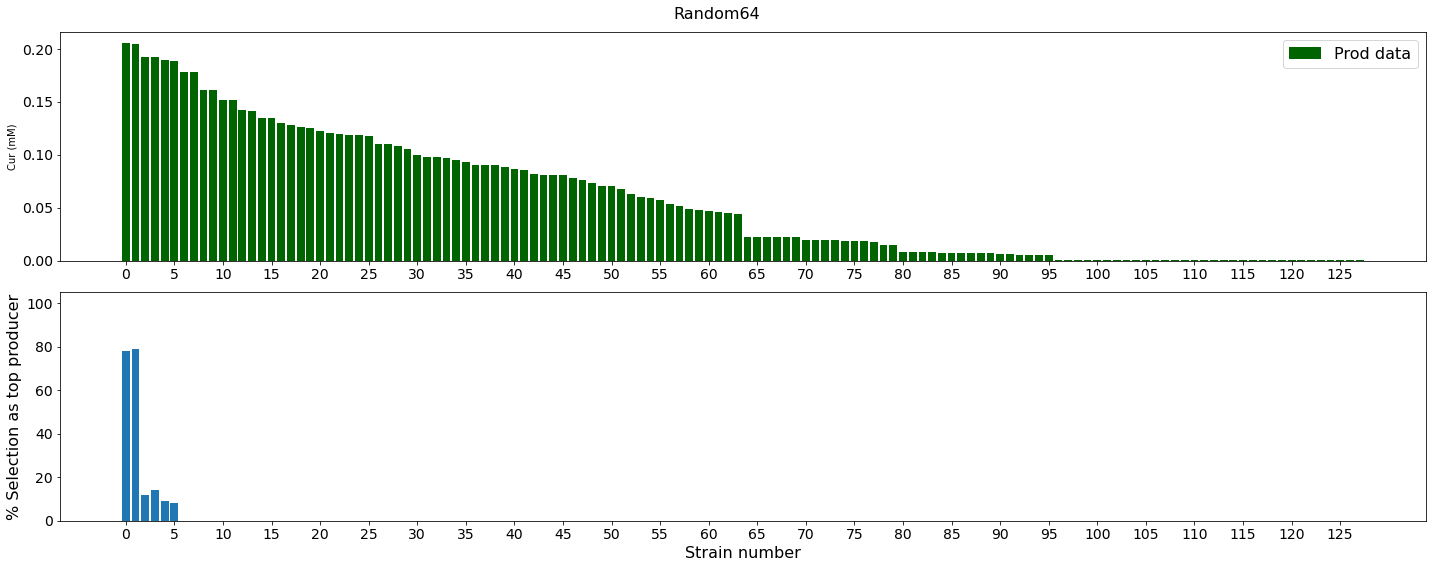

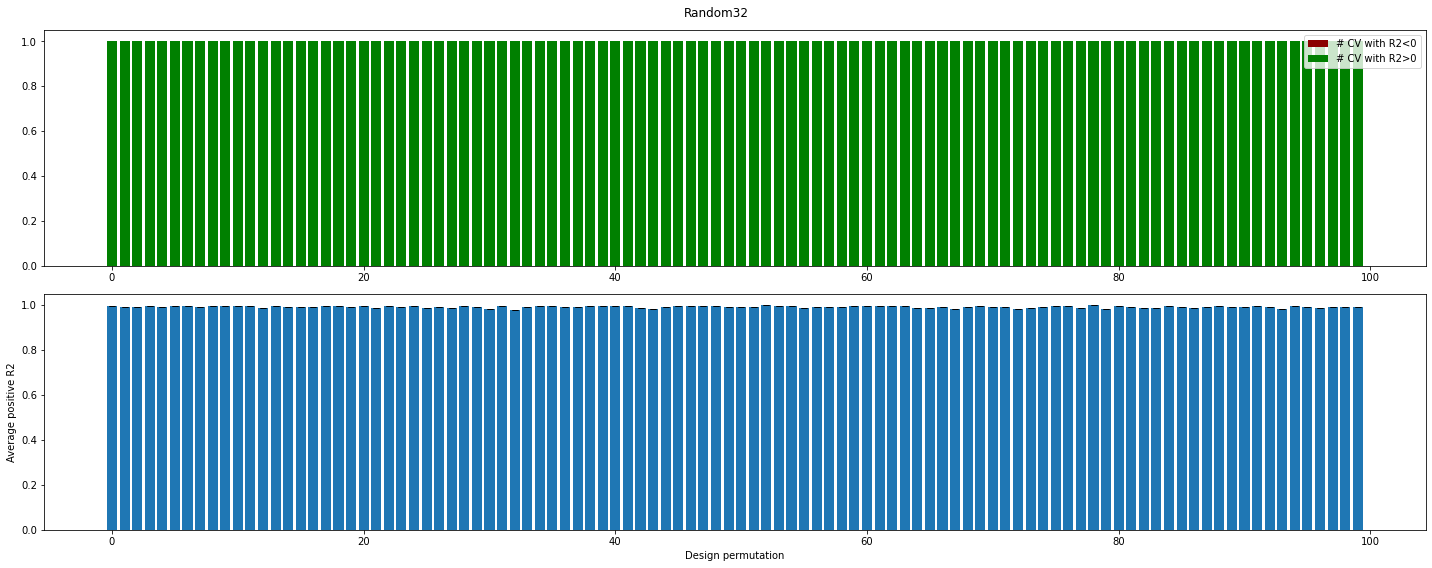

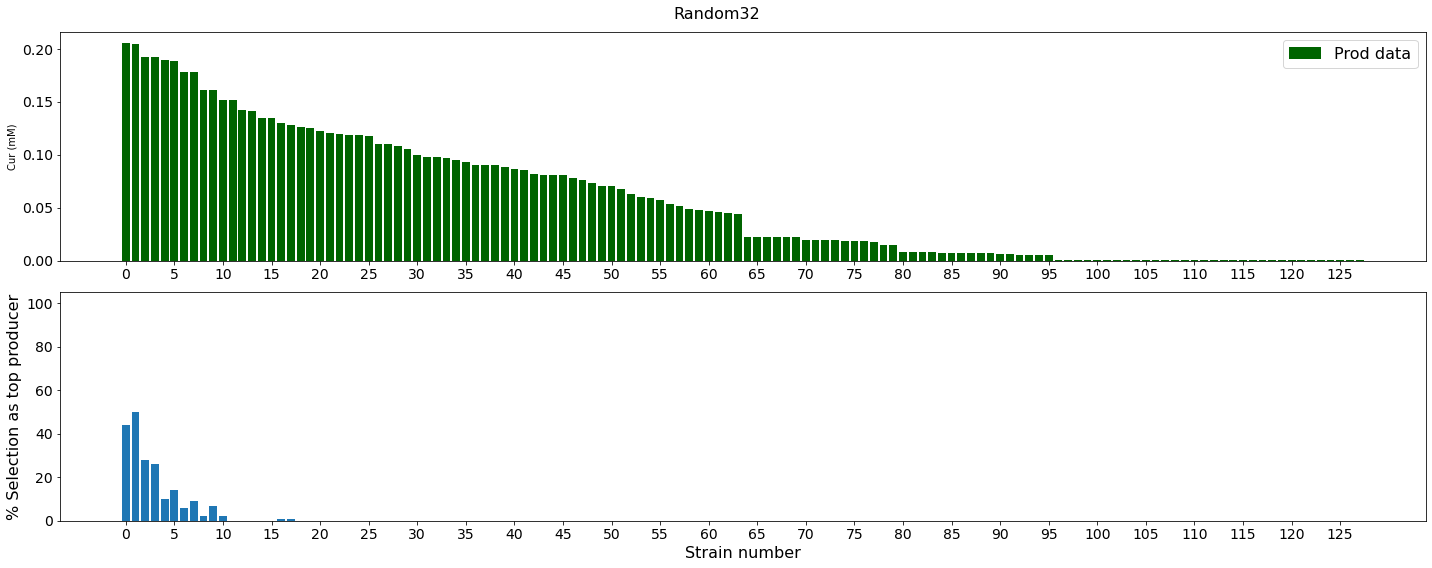

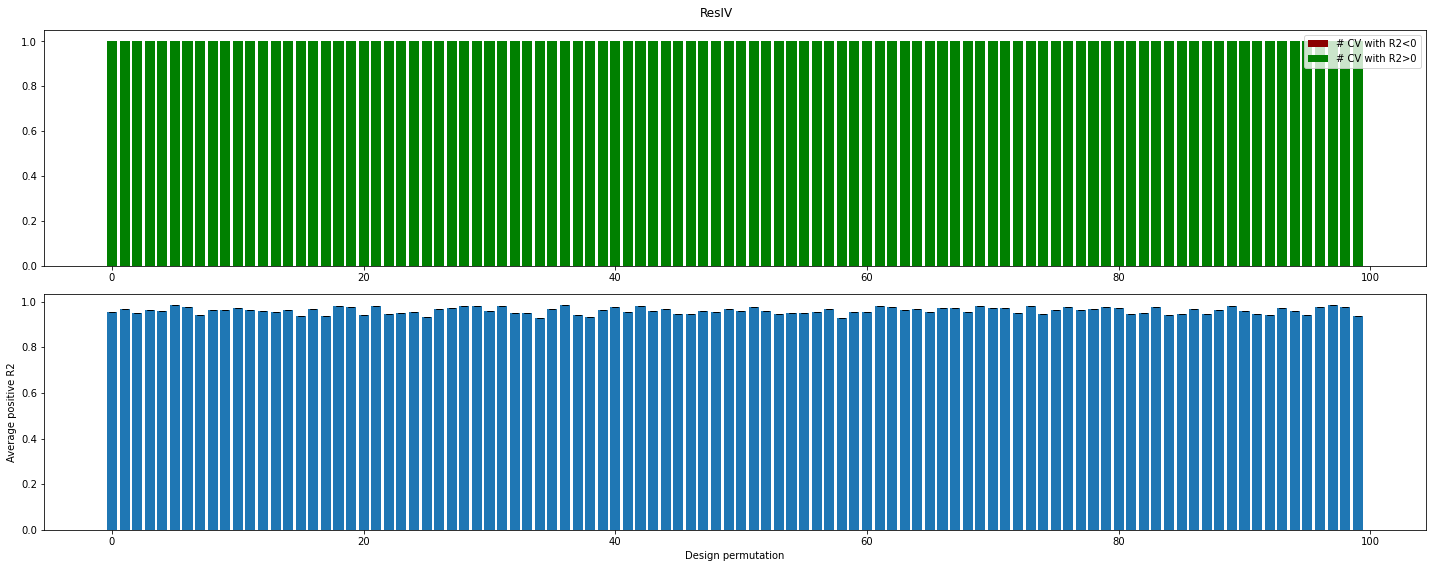

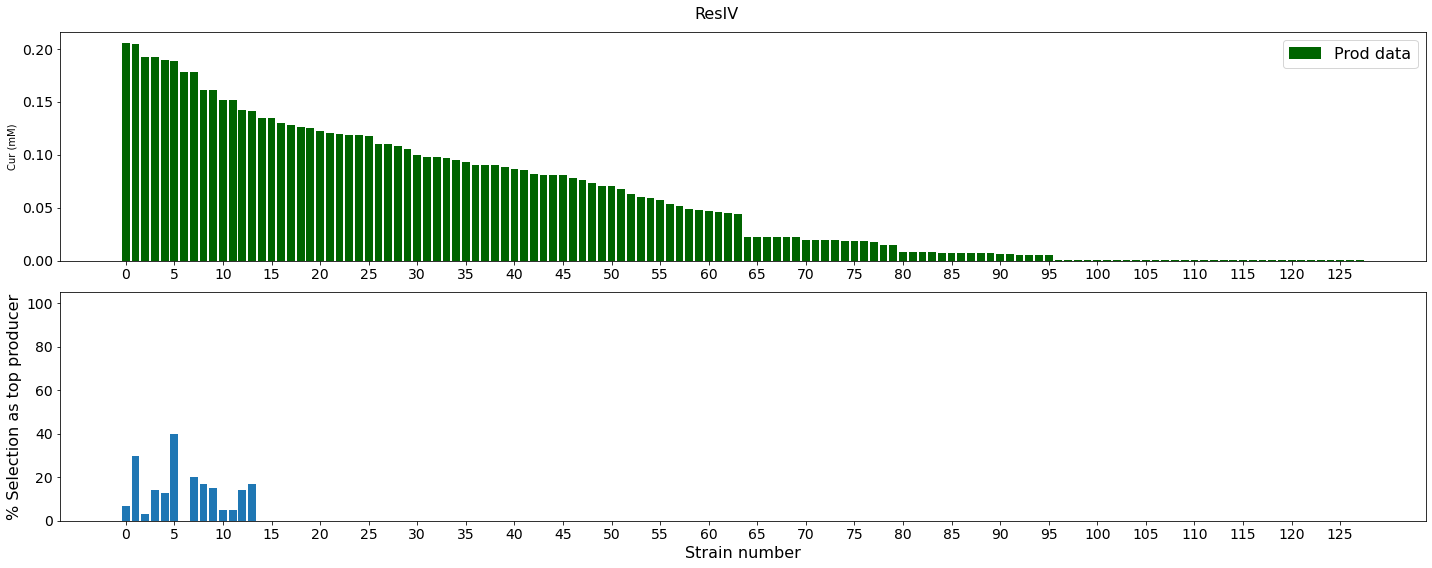

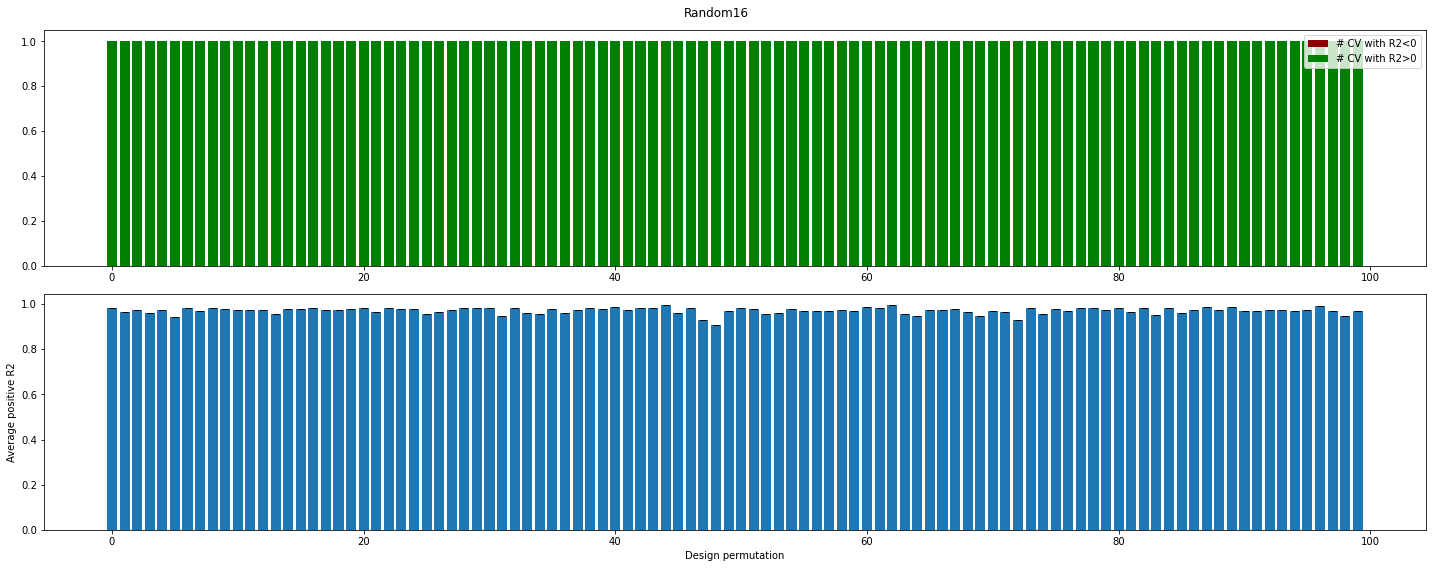

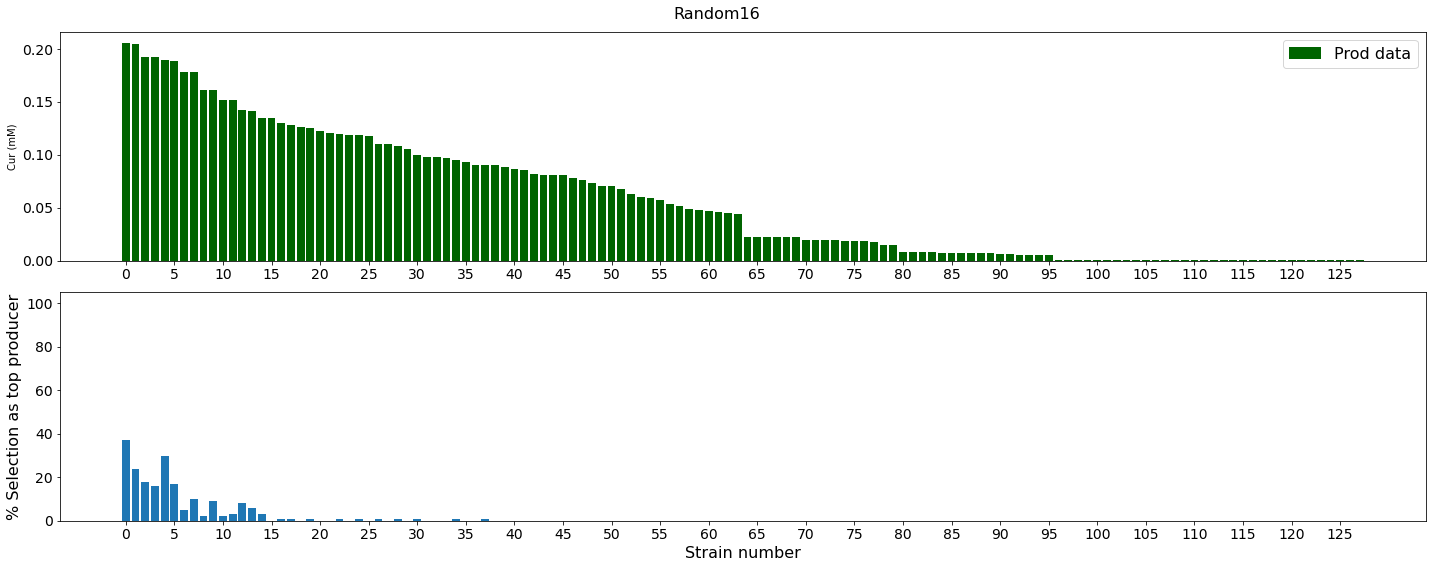

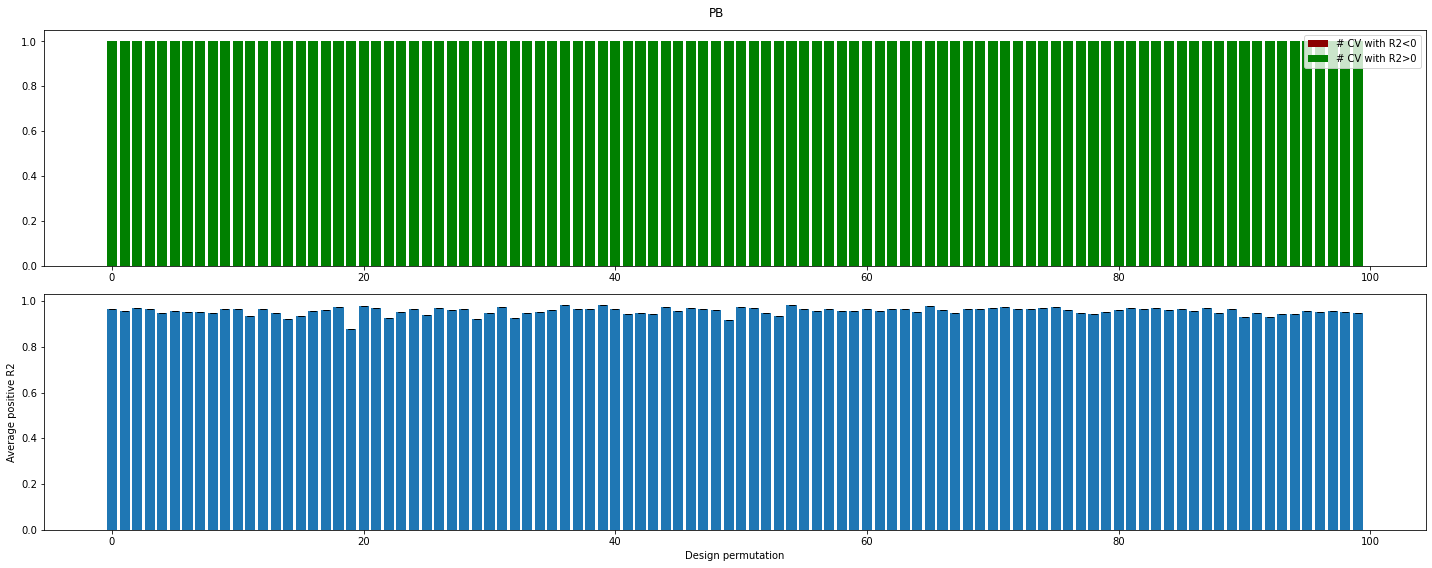

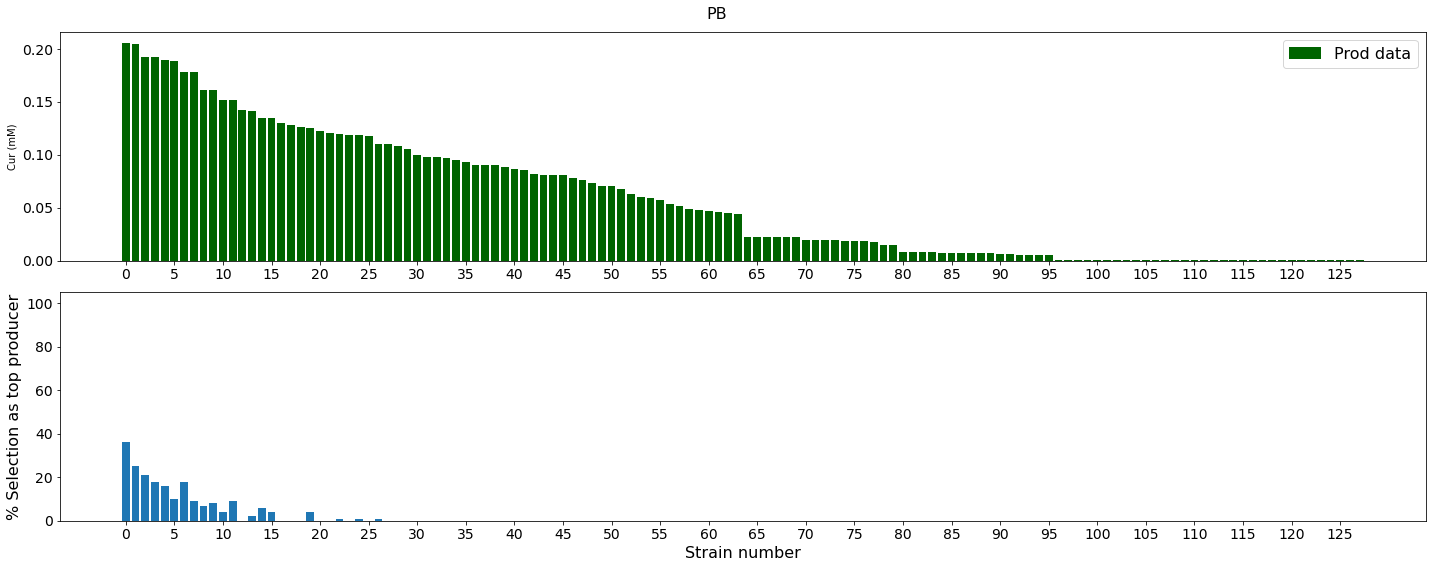

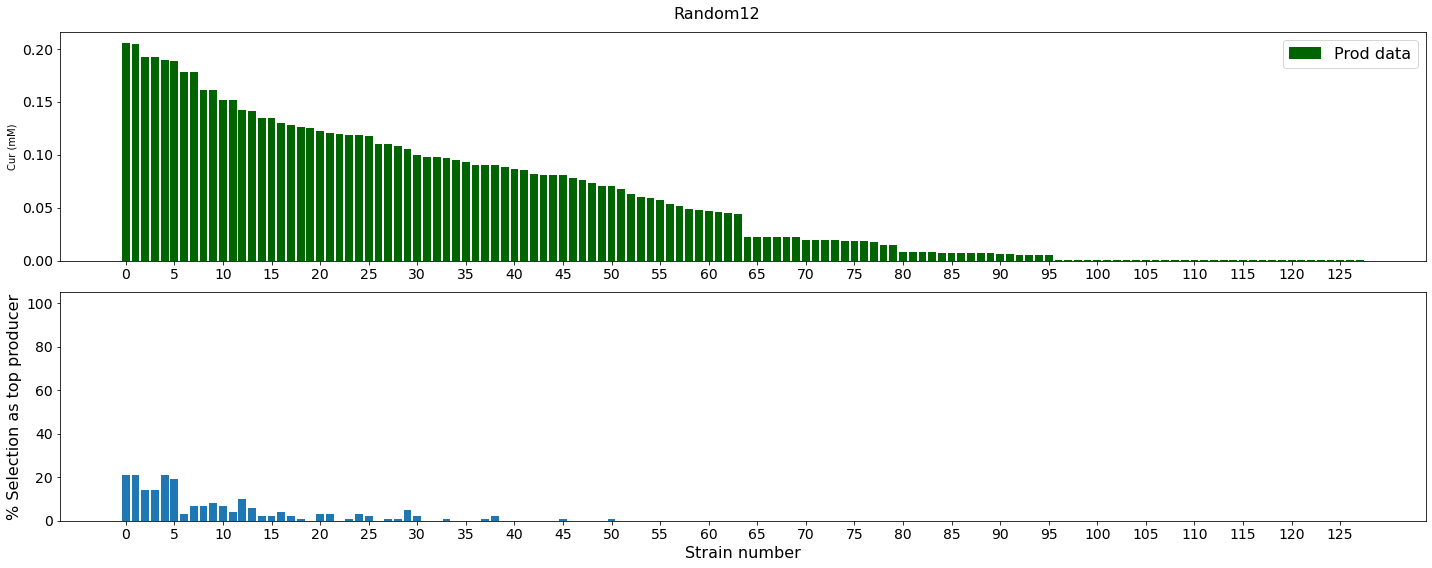

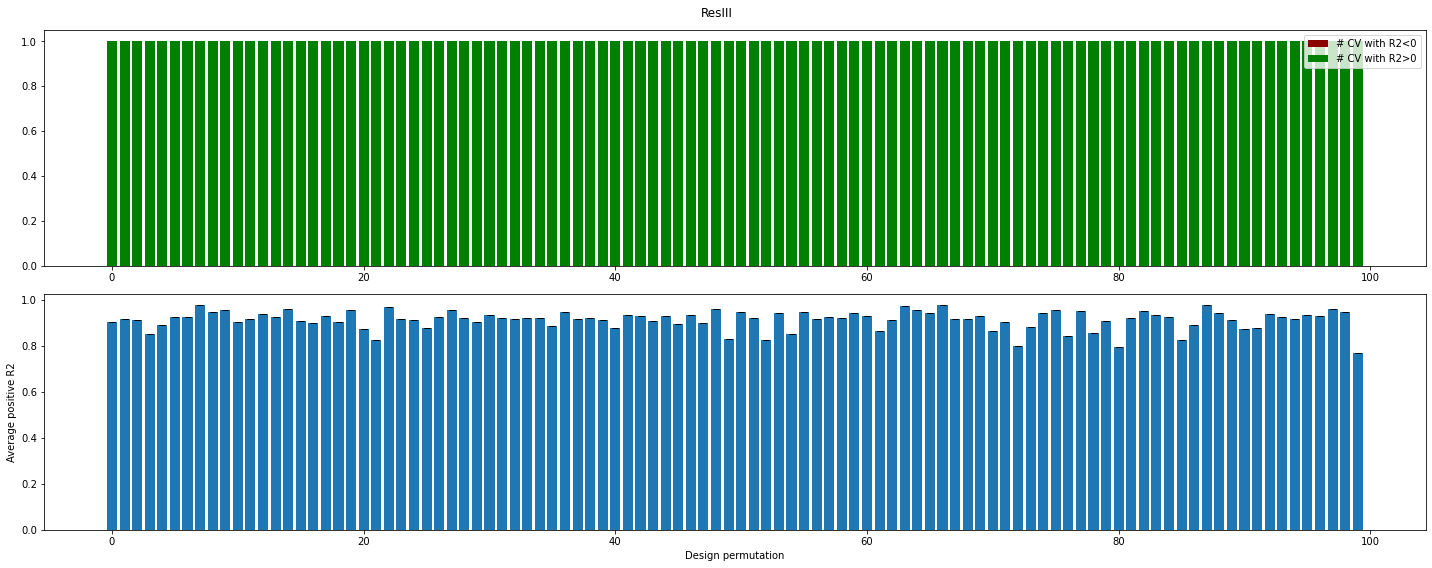

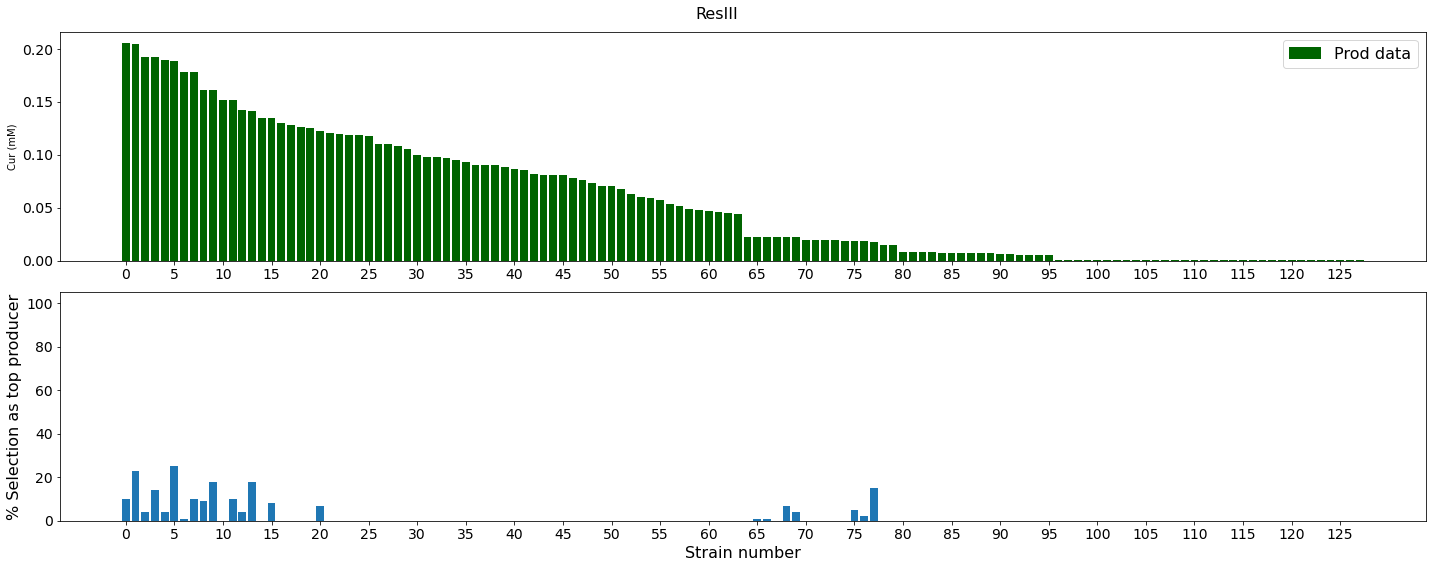

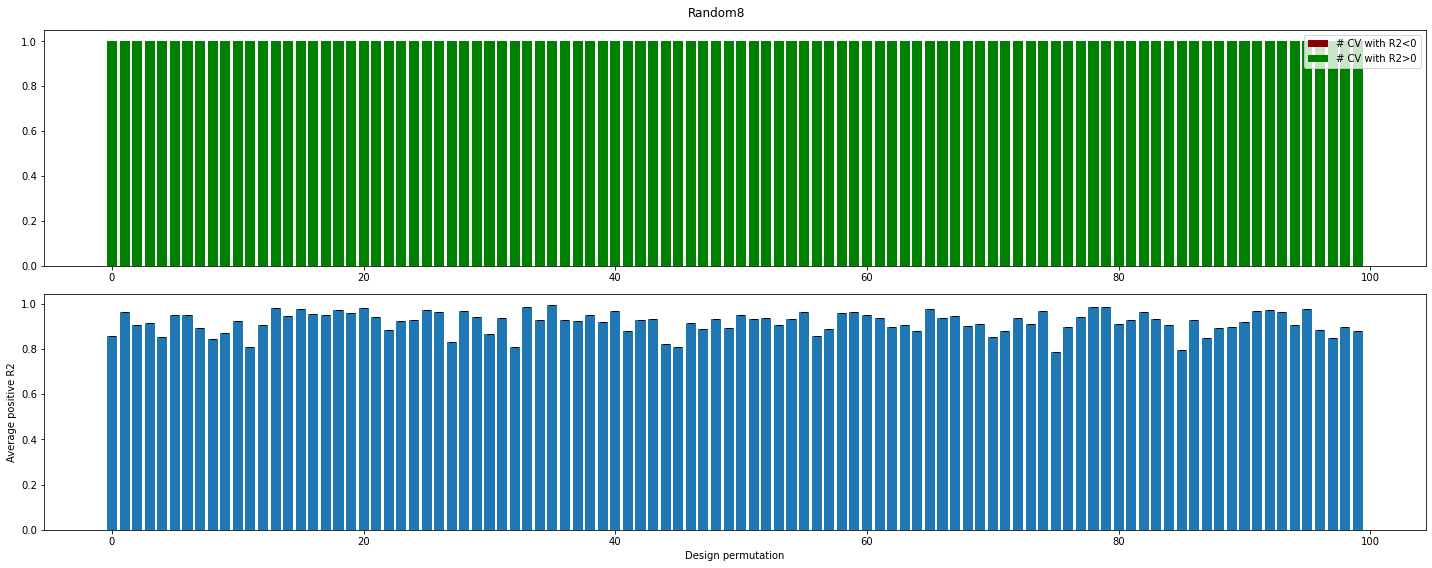

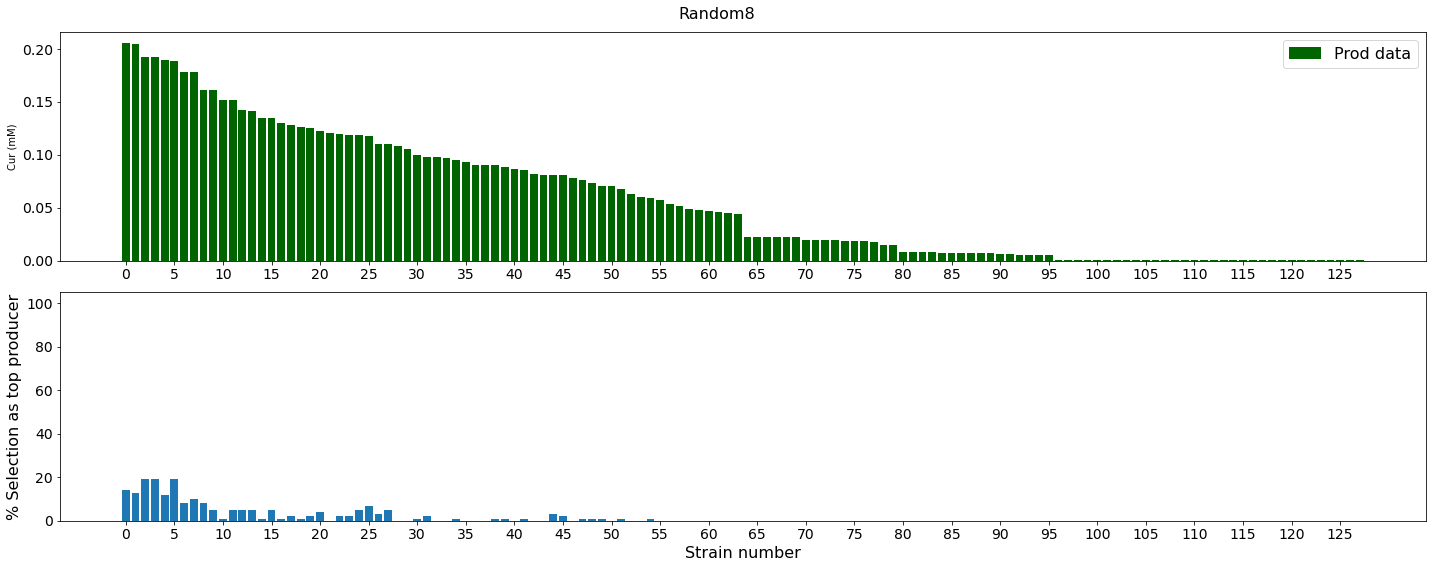

In [10]:
for design in rf_dict.keys():
    number_neg_r2 = []
    number_pos_r2 = []
    average_pos_r2 = []
    std_pos_r2 = []
    top_strains = []
    for experiment in rf_dict[design].keys():
        neg_r2 = 0
        pos_r2 = 0
        pos_r2_list = []
        r2 = rf_dict[design][experiment]['r2']
        top2 = rf_dict[design][experiment]['top2']
        if r2 < 0:
            neg_r2 += 1
        else:
            pos_r2 += 1
            pos_r2_list.append(r2)
            top_strains += top2
        number_neg_r2.append(-neg_r2)
        number_pos_r2.append(pos_r2)
        average_pos_r2.append(np.mean(pos_r2_list))
        std_pos_r2.append(np.std(pos_r2_list))
    
    # Visualization R2
    fig, axs = plt.subplots(2,1,figsize=(20, 8), tight_layout=True)
    axs[0].bar(range(100), number_neg_r2, label='# CV with R2<0', color='darkred')
    axs[0].bar(range(100), number_pos_r2, label='# CV with R2>0', color='green')
    axs[0].legend()
    axs[1].bar(range(100), average_pos_r2,yerr=std_pos_r2, capsize=3)
    axs[1].set_ylabel('Average positive R2')
    axs[1].set_xlabel('Design permutation')
    fig.suptitle(design)
    plt.show()
    
    # Visualization top strains
    dictionary = dict(zip(Counter(top_strains).keys(), Counter(top_strains).values()))
    top_strains_dict = {i: 0 for i in range(128)}
    for key in top_strains_dict.keys():
        try:
            top_strains_dict[key]=dictionary[key]
        except:
            continue
    fig, axs = plt.subplots(2,1,figsize=(20, 8), tight_layout=True)
    axs[0].tick_params(axis='both', labelsize=14)
    axs[0].bar(data_sorted.index, data_sorted['cur'], color='darkgreen', label='Prod data')
    axs[0].set_xticks(np.arange(0,130, 5))
    axs[0].set_ylabel('Cur (mM)')
    axs[0].legend(fontsize=16)
    axs[1].tick_params(axis='both', labelsize=14)
    axs[1].bar(top_strains_dict.keys(), top_strains_dict.values())
    axs[1].set_xticks(np.arange(0,130, 5))
    axs[1].set_ylabel('% Selection as top producer', fontsize=16)
    axs[1].set_ylim([0, 105])
    axs[1].set_xlabel('Strain number', fontsize=16)
    fig.suptitle(design, fontsize=16)
    plt.show()



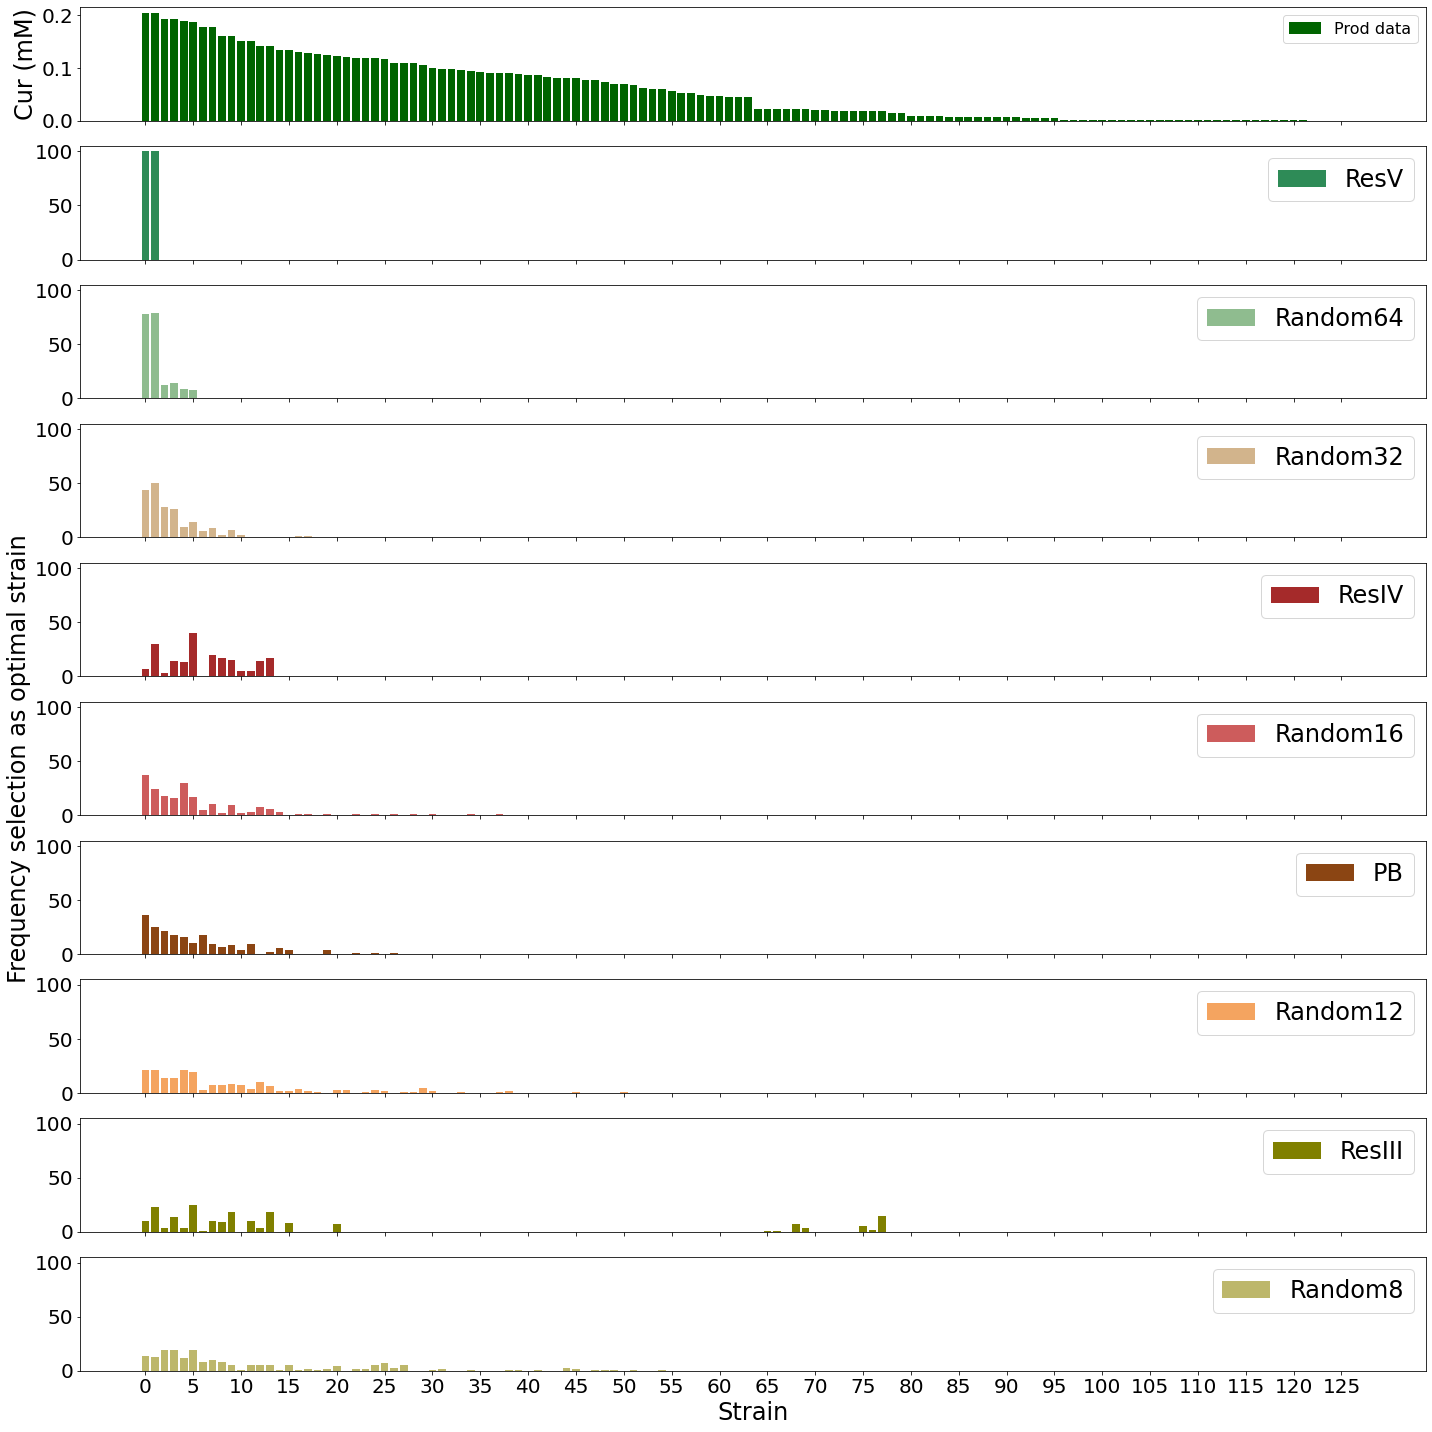

In [11]:
color_list = ['seagreen', 'darkseagreen', 'tan', 'brown', 'indianred', 'saddlebrown', 'sandybrown', 'olive', 'darkkhaki']

fig, axs = plt.subplots(10,1,figsize=(20, 20), tight_layout=True, sharex=True)

axs[0].tick_params(axis='both', labelsize=20)
axs[0].bar(data_sorted.index, data_sorted['cur'], color='darkgreen', label='Prod data')
axs[0].set_xticks(np.arange(0,130, 5))
axs[0].set_ylabel('Cur (mM)', fontsize=24)
axs[0].legend(fontsize=16)
# Set the ticks and labels explicitly
axs[0].yaxis.set_major_locator(MaxNLocator(nbins=3))
yticks = np.arange(0, 0.3, 0.1)
axs[0].set_yticks(yticks)
axs[0].set_yticklabels([str(num) for num in yticks])
#axs[0].set_xlabel('Strain', fontsize=24)

for design, ax, color in zip(rf_dict.keys(), axs.flat[1:], color_list):
    top_strains = []
    for experiment in rf_dict[design].keys():
        top2 = rf_dict[design][experiment]['top2']
        top_strains += top2
        
    dictionary = dict(zip(Counter(top_strains).keys(), Counter(top_strains).values()))
    top_strains_dict = {i: 0 for i in range(128)}
    for key in top_strains_dict.keys():
        try:
            top_strains_dict[key]=dictionary[key]
        except:
            continue
    ax.tick_params(axis='both', labelsize=20)
    # Set the ticks and labels explicitly
    ax.yaxis.set_major_locator(MaxNLocator(nbins=3))
    yticks = np.arange(0, 150, 50)
    ax.set_yticks(yticks)
    ax.set_yticklabels([str(num) for num in yticks])
    ax.bar(top_strains_dict.keys(), top_strains_dict.values(), color=color, label=design)
    ax.set_xticks(np.arange(0,130, 5))
    if design == 'Random16':
        ax.set_ylabel('Frequency selection as optimal strain', fontsize=24)
    ax.set_ylim([0, 105])
    if design == 'Random8':
        ax.set_xlabel('Strain', fontsize=24)
    ax.legend(fontsize=24)
plt.show()